<a href="https://colab.research.google.com/github/BhanuPShahi/TED-talk-views-prediction/blob/main/Ted_Talk_Views_Prediction_Bhanu_P_Shahi_17_05_2021_%5BTeam_2%5D_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ted Talk Views Prediction**

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**

###**The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

##**Importing Libraries**

In [381]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

##**Loading the dataset**

In [382]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Projects/Ted Talk Views Prediction/data_ted_talks.csv'
df=pd.read_csv(path)

##**Let's start with Exploratory Data Analysis**

In [383]:
df.shape

(4005, 19)

* **No of records: 4005**
* **No of columns: 19**
* **Target Variable: 'views'**

In [384]:
#printing the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* **Here, we have only 3 numerical columns in our dataset out of which 1 is our target variable and 2 can be used as features and rest all columns are either categorical or they acontains textual data.**
* **So, our main goal here is to find or generate some numerical columns from these columns.**

In [385]:
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


**Checking for duplicate rows** 

In [386]:
df.duplicated().sum()

0

* **The dataset doesn't contain any duplicate rows.**

##**Let's Check for null values**

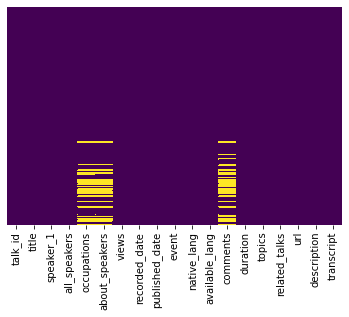

In [387]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (15, 5)

In [388]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

**Dropping the url column as it is of no use for us.**

In [389]:
#dropping the url column
df=df.drop(columns=['url'])

In [390]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'description', 'transcript'],
      dtype='object')

##**Let's explore speaker_1 column**

**Speaker of top 10 most watched video**

In [391]:
#Extarcting the records of top 10 most viewed videos
pop_df=df.nlargest(10, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


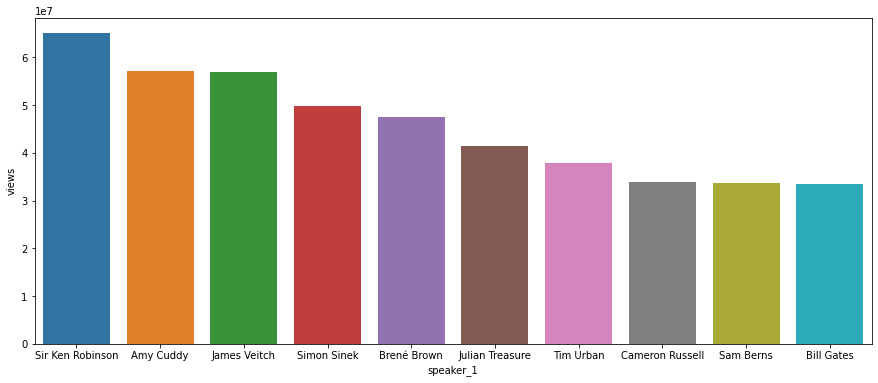

In [392]:
plt.figure(figsize=(15,6))
sns.barplot(x='speaker_1',y='views',data=pop_df)

* **Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.**
* **It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views**
* **There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.**

**Let's find most popular speaker**

In [393]:
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977


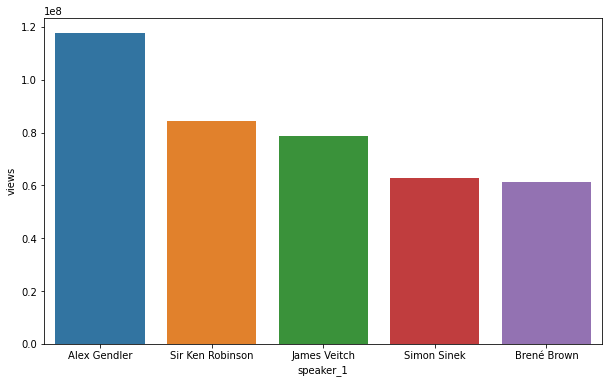

In [394]:
plt.figure(figsize=(10,6))
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

* **Alex Gendler is the most popular speaker followed by Sir Ken Robinson**

##**Let's explore the event column**

**Let's Check for unique event category in event column.**

In [395]:
#printing the len of unique values in event column
len(df.event.unique())

459

* **We have 459 unique entries in event column**

**Let's explore the most frequent event category**

In [396]:
#let's find the most frequent event categories
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


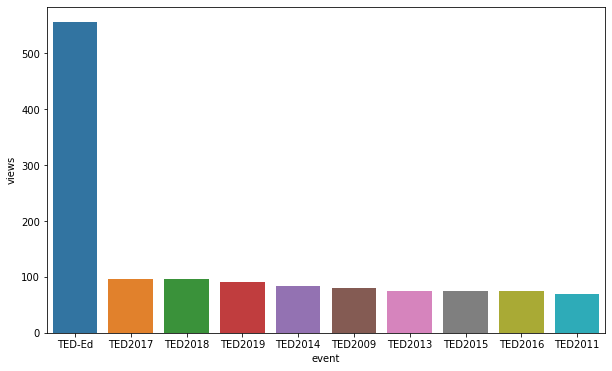

In [397]:
plt.figure(figsize=(10,6))
sns.barplot(x='event',y='views',data=freq_event_df)

* **TED-Ed is the most frequent event category with 556 entries followed by TED2017 and TED2018**

**Let's explore the most popular event category**

In [398]:
#let's find the most popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_event_df.reset_index(inplace=True)

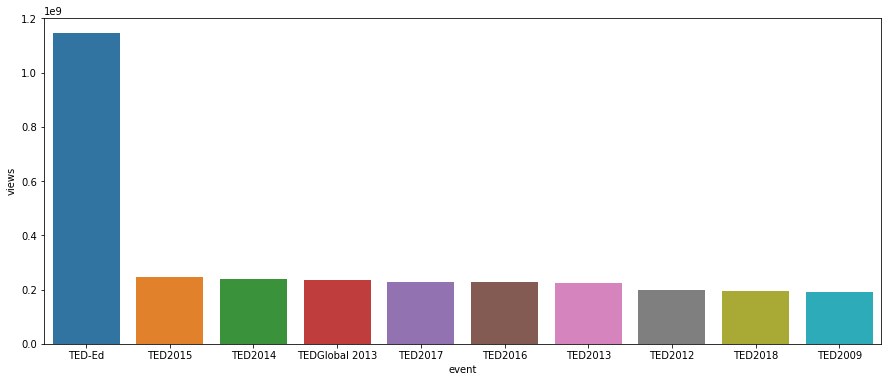

In [399]:
plt.figure(figsize=(15,6))
sns.barplot(x='event',y='views',data=pop_event_df)

* **TED-Ed is the most popular event category having maximum number of views followed by TED2015.**

In [400]:
event_list=list(df.event.unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

###**The dataset has 459 unique event category but lots of these names are quite similar and can be categorised together.**

In [401]:
#introducing a new column called event category
df['event_category'] = 'Other'
#categorising each record into the new event_category column according to their event
for i in range(len(df)):
    if df['event'][i][0:5]=='TED20':
        df['event_category'][i] = 'TED2000s'
    elif df['event'][i][0:6]=='TED-Ed':
        df['event_category'][i] = 'TED-Ed'
    elif df['event'][i][0:5]=='TED19':
        df['event_category'][i] = 'TED1900s'
    elif df['event'][i][0:4]=='TEDx':
        df['event_category'][i] = "TEDx"
    elif df['event'][i][0:7]=='TED@BCG':
        df['event_category'][i] = 'TED@BCG'
    elif df['event'][i][0:4]=='TED@':
        df['event_category'][i] = "TED@"
    elif df['event'][i][0:8]=='TEDSalon':
        df['event_category'][i] = "TEDSalon"
    elif df['event'][i][0:9]=='TEDGlobal':
        df['event_category'][i] = 'TEDGlobal'
    elif df['event'][i][0:8]=='TEDWomen':
        df['event_category'][i] = 'TEDWomen'
    elif df['event'][i][0:6]=='TEDMED':
        df['event_category'][i] = 'TEDMED'
    elif df['event'][i][0:3]=='TED':
        df['event_category'][i] = 'TEDOther'

In [402]:
df.event_category.value_counts()

TED2000s     1178
TEDx          696
TED-Ed        561
TEDGlobal     516
TEDOther      349
TEDWomen      194
Other         144
TED@          128
TEDMED         92
TEDSalon       79
TED@BCG        59
TED1900s        9
Name: event_category, dtype: int64

* **Now, we have 12 unique values in the event_category column.**
* **Majority of videos are in TED2000s category followed by TEDx and TED-Ed.**
* **We can further use this feature while modelling by applying some encoding techniques.**
* **We can drop the event column now.**

In [403]:
#Let's drop event column
df=df.drop(columns='event')

##**Let's explore native_lang column**

In [404]:
df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
zh-cn       1
ko          1
pt-br       1
pt          1
de          1
it          1
ar          1
Name: native_lang, dtype: int64

* **Here, approx 99% values in native_lang column is en.**
* **So, this column is of no use to us and we can simply remove it.**

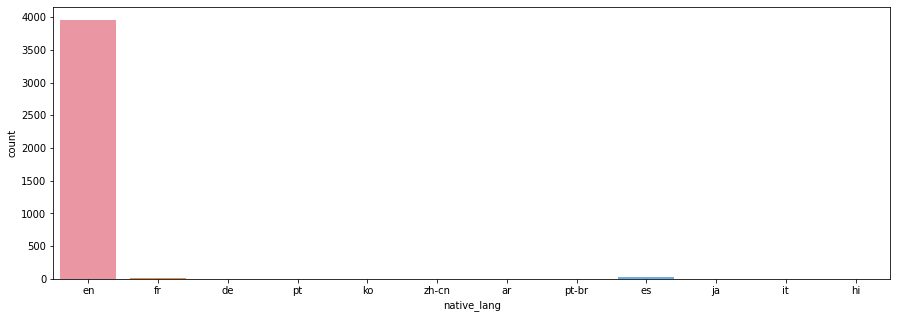

In [405]:
sns.countplot(df['native_lang'])

In [406]:
#Dropping the native_lang column
df.drop(columns='native_lang',inplace=True)

In [407]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'description', 'transcript', 'event_category'],
      dtype='object')

##**Let's explore available_lang column**

**In available_lang column we have a list of available languages for each video.**

In [408]:
#applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [409]:
len(df['available_lang'][10])

26

**Let's add a new feature which contain the count of total no of language for a particular video.**

In [410]:
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

In [411]:
#dropping the available_lang column
df.drop(columns='available_lang',inplace=True)

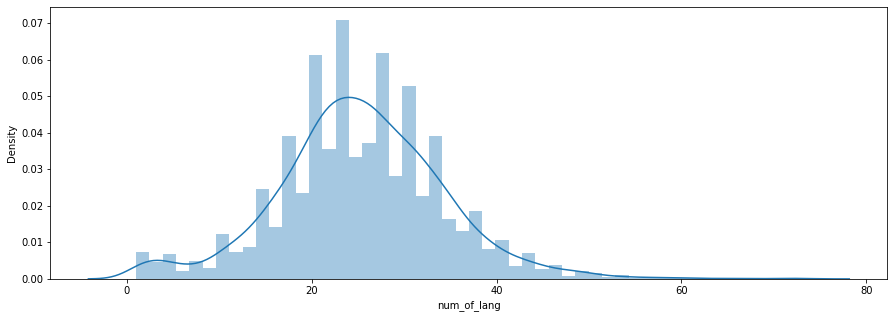

In [412]:
sns.distplot(df['num_of_lang'])

##**Let's explore topics column**

In [413]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

* **The topics column basically contains the list of topic tags associated with each video.**

In [414]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

**Let's add a new feature which contain the count of total no of topics for a particular video.**

In [415]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

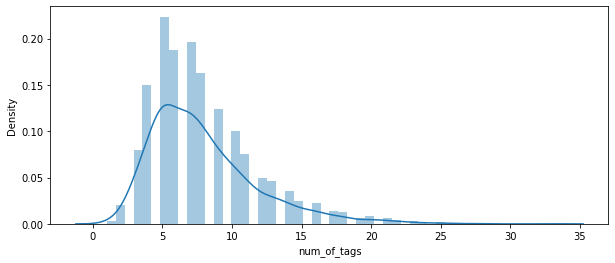

In [416]:
plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])

###**Let's visualize most popular topic tags with word cloud**

There are 404126 words in the combination of all topics.


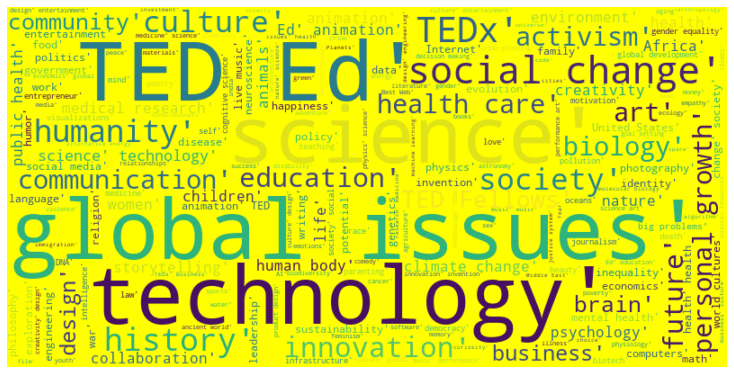

In [417]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="yellow", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##**Let's explore the title column and visualize the most frequent words in title.**

There are 157160 words in the combination of all titles.


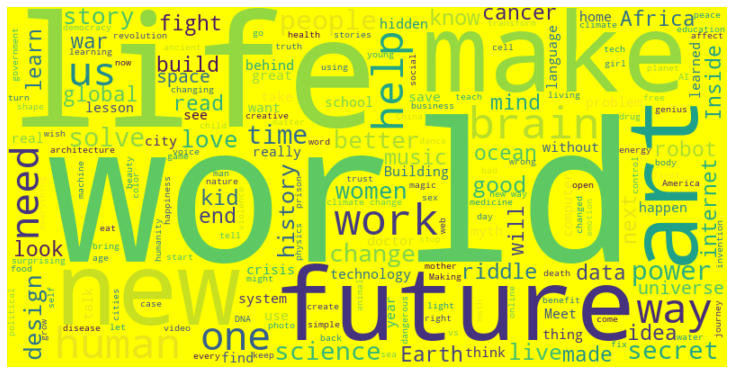

In [418]:
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="yellow", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Majoriity of Titles contains words like life, world, make, new, future, art.** 

##**Let's explore occupation column.**

In [419]:
df['occupations'][0]

"{0: ['climate advocate']}"

In [332]:
df['occupations'].isna().sum()

522

* **We have 522 Nan values in occupations column.**
* **Let's replace those NaN values with another category called 'other'.**

In [420]:
#replacing Nan values of occupations column with other 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = 'Other'

**Let's make the world cloud for occupations column.**

There are 107517 words in the combination of all occupations.


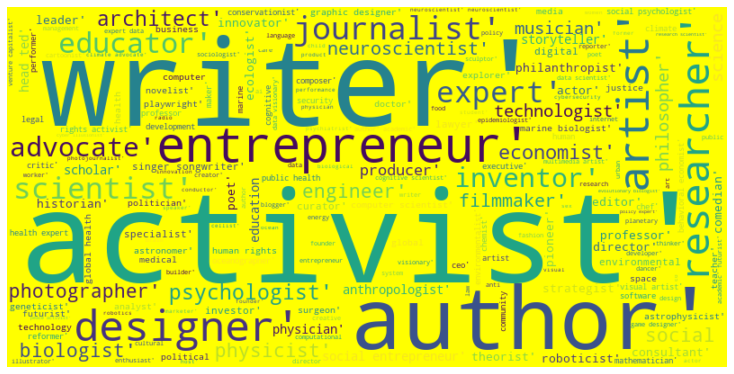

In [421]:
text = " ".join(occ for occ in df.occupations.astype(str))
print ("There are {} words in the combination of all occupations.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="yellow", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Most of the speakers are activist folowed by writer, author and enterpreneur.**

In [424]:
# occupation_df = df.groupby('occupations').count().reset_index()[['occupations', 'comments']]
# occupation_df.columns = ['occupations', 'appearances']
# occupation_df = occupation_df.sort_values('appearances', ascending=False)
# plt.figure(figsize=(20,5))
# sns.barplot(x='occupations', y='appearances', data=occupation_df.head(10))
# plt.show()

##**Let's explore published_date column**

In [425]:
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [426]:
#extracting release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

**I have extracted weekday month and year from published_date column and added three separate columns as:**
* **release_day**
* **release_month**
* **release_year**

In [427]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

###**Let's explore release_day column.**

**Checking the most frequent release day of the week.**

In [428]:
#checking the day of the month having maximum release date 
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

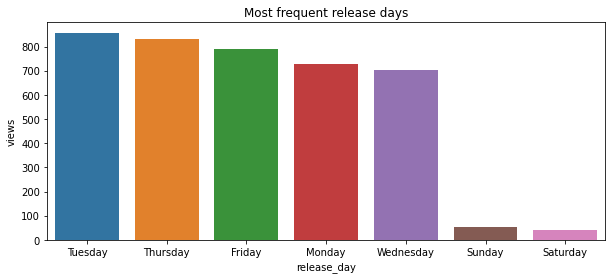

In [429]:
# checking the day of the week having maximum release date 
plt.figure(figsize=(10,4))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

**Let's check the best release day of the week with respect to average views**

In [430]:
pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

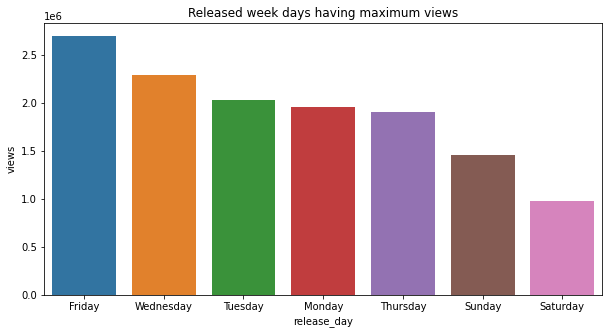

In [431]:
plt.figure(figsize=(10,5))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

* **Most videos are published on Tuesday followed by Thursday.**
* **But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.**
* **Friday release is impacting the views of the video**

###**Let's explore release_month column**

In [432]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

Text(0.5, 1.0, 'Most frequent release months')

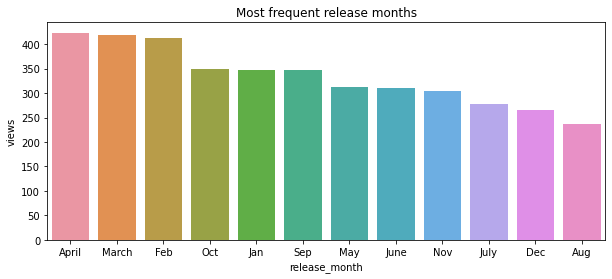

In [433]:
#checking months having maximum release 
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
# checking the months having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

* **Most videos are released in April followed by March and Feb.**

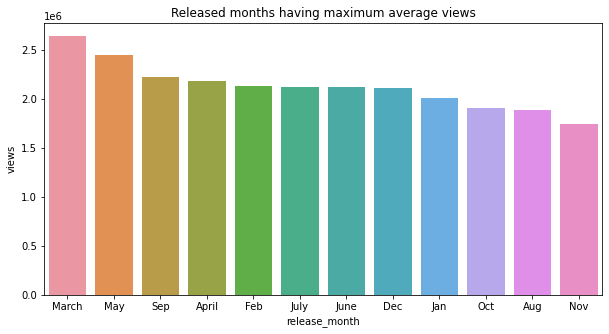

In [434]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

* **April have maximum released videos, But the videos released in March are more popular (i.e. have more average views) followed by May and Sep.**

###**Let's explore release_year column.**

Text(0.5, 1.0, 'Most frequent release years')

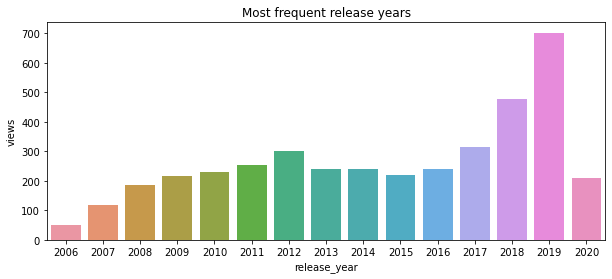

In [435]:
#checking years having maximum release 
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)
#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

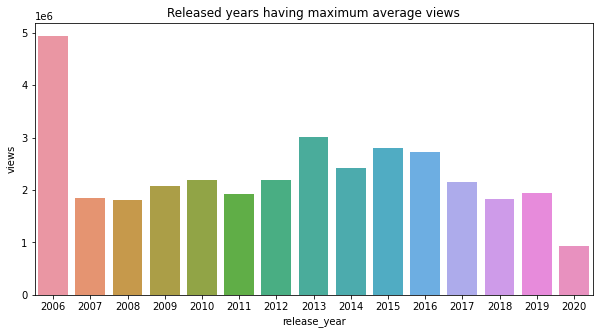

In [436]:
#Printing the most popular release years according to AVERAGE Views
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

* **Most videos are published in 2019 followed by 2018 and 2017.**
* **But the videos published in 2006 are most viewed followed by 2013 and 2015.**

**We can add a new column called video_age which is the difference of current year and published year.**

In [437]:
df['video_age']=2021-df['release_year']

**Now, we can drop  published_date column.**

In [438]:
df=df.drop(columns='published_date')

##**Let's explore related_talks column.**

* **Related_talks column contains a dictionary containing information about six related videos with talk_id as key and video title as it's value.**
* **We can take mean of the views of those six related talks for each video and can add a new feature called related_talks_views.**

In [439]:
#applying eval function on available_lang column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [440]:
df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

In [441]:
df['related_talks_views'] = 0

In [442]:
ele=243
d=df[df['talk_id']==ele]
int(d.views.to_string(index=False))

2187523

In [443]:
df["views"] = [float(str(i).replace(",", "")) for i in df["views"]]

In [444]:
df['views']=df['views'].apply(lambda x : int(x))

##**Let's explore some numerical features.**

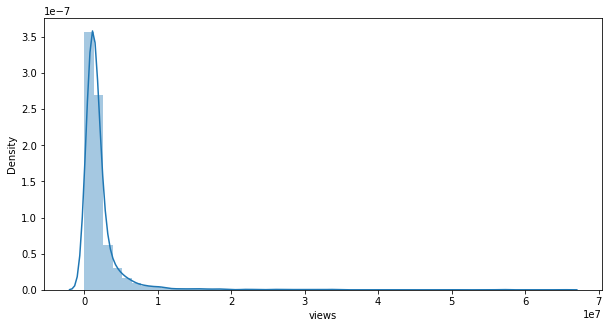

In [445]:
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

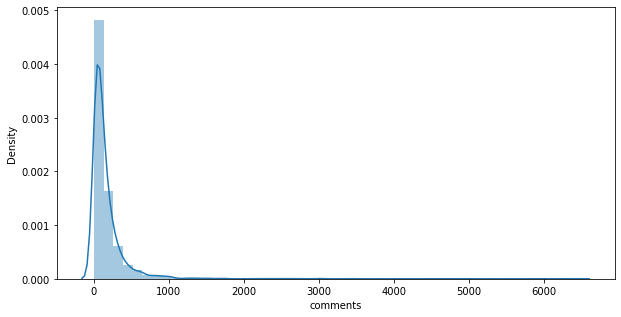

In [446]:
plt.figure(figsize=(10,5))
sns.distplot(df['comments'])

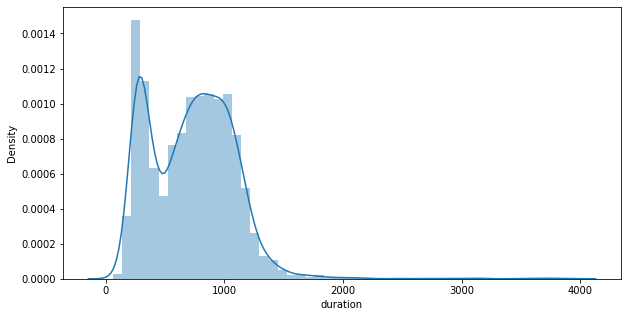

In [447]:
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

##**Let's treat nan values of numerical columns using KNNImputer**

In [448]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['duration','comments']])
df[['duration','comments']] = imputer.transform(df[['duration','comments']])

In [449]:
df[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

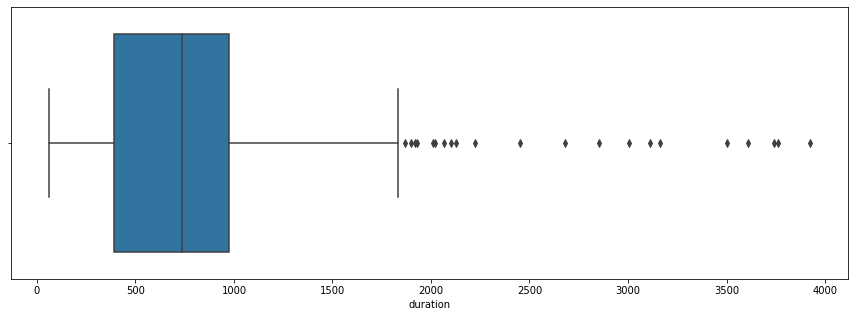

In [450]:
sns.boxplot(x=df['duration'])

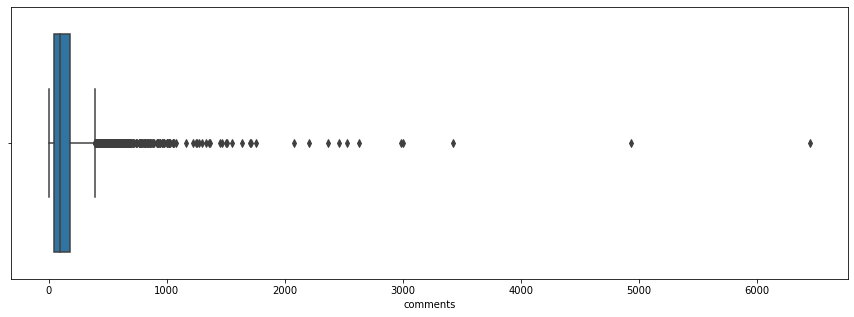

In [451]:
sns.boxplot(x=df['comments'])

We have some outliers in our numerical features.

In [452]:
num_df=df[['views','comments','duration','num_of_lang','num_of_tags','video_age']]

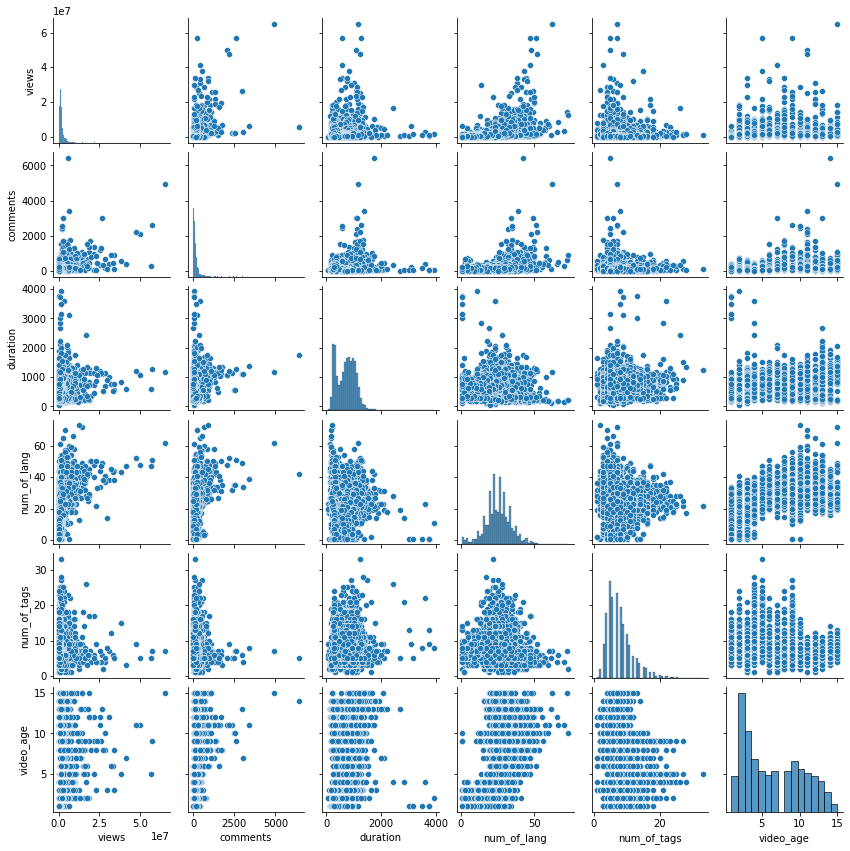

In [453]:
sns.pairplot(num_df,size=2)

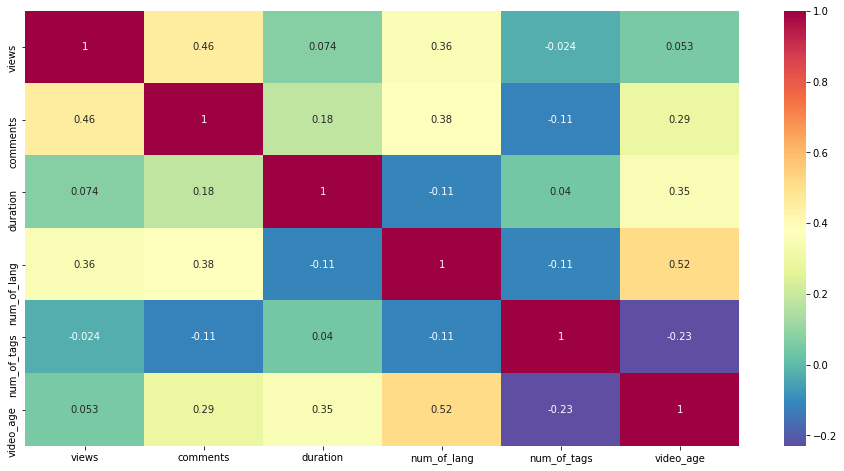

In [455]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(num_df.corr(),annot=True, cmap='Spectral_r')

In [456]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'comments', 'duration',
       'topics', 'related_talks', 'description', 'transcript',
       'event_category', 'num_of_lang', 'num_of_tags', 'release_day',
       'release_month', 'release_year', 'video_age', 'related_talks_views'],
      dtype='object')

**Dropping textual columns from our dataframe.**

In [460]:
df1=df[['views','comments','duration','num_of_lang','num_of_tags','release_day','release_month','video_age','event_category']]

**Doing one hot encoding using get_dummies function.**

In [461]:
final_df=pd.get_dummies(df1)
final_df.shape

(4005, 37)

In [462]:
X=final_df.drop(columns=['views'])
y=final_df['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=121212)

###**Feature selection for numerical features.**

In [463]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [464]:
f_scores = f_regression(final_df, views)
f_scores

(array([-1.09926276e+17,  1.07911409e+03,  2.18272996e+01,  5.79875934e+02,
         2.39026992e+00,  1.14808807e+01,  2.47205918e+01,  2.81193303e+00,
         4.84813295e+00,  2.22932912e+00,  5.08411567e+00,  1.37722250e+00,
         1.51355200e+00,  4.27342794e-02,  1.46563489e+00,  3.54204730e-02,
         5.60325654e-03,  5.71791155e-01,  1.01373795e-02,  1.42786889e-02,
         9.69403913e+00,  2.59140573e+00,  4.48081024e+00,  1.83534439e+00,
         1.88371070e-01,  1.29030781e+01,  5.21381816e-01,  9.72966789e-01,
         1.93468460e+01,  3.30500169e+00,  2.11695789e-01,  9.97353389e-01,
         1.15313608e-03,  2.60869745e+00,  3.69294858e-02,  1.44017660e+00,
         6.80981742e-01]),
 array([1.00000000e+000, 9.19769042e-210, 3.08124671e-006, 9.03081853e-120,
        1.22171594e-001, 7.09949633e-004, 6.90487429e-007, 9.36436494e-002,
        2.77329142e-002, 1.35491443e-001, 2.41998068e-002, 2.40644643e-001,
        2.18670174e-001, 8.36236933e-001, 2.26107148e-001, 8.

Text(0.5, 1.0, 'P-value scores for numerical features')

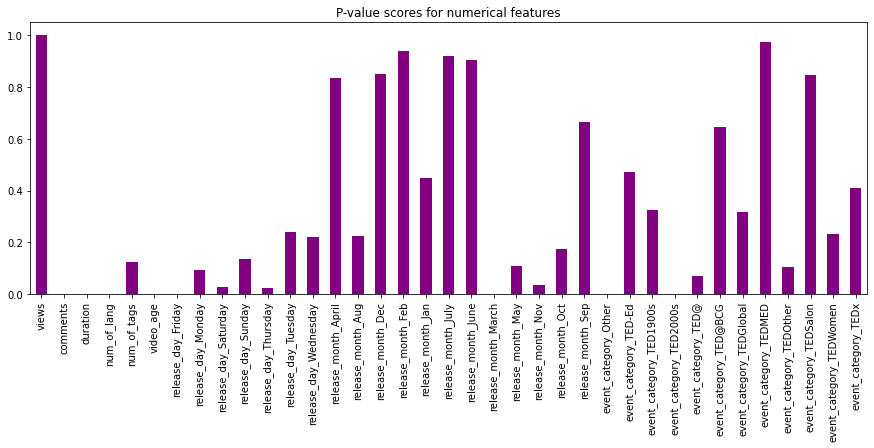

In [470]:
#The second array consists of p-values that we need
p_values= pd.Series(f_scores[1],index= final_df.columns)
p_values.plot(kind='bar',color='purple')
plt.title('P-value scores for numerical features')

* **From here using p value analysis we can drop those features having high p values.**

In [466]:
#taking the list of only important features and dropping the less important features
l=['comments', 'duration', 'num_of_lang', 'num_of_tags', 'video_age','release_day_Friday', 'release_day_Monday', 'release_day_Saturday',
       'release_day_Sunday', 'release_day_Thursday', 'release_day_Tuesday',
  'release_day_Wednesday', 'release_month_Aug','release_month_March','release_month_May', 'release_month_Nov', 'release_month_Oct', 
    'event_category_Other','event_category_TED1900s', 
'event_category_TED2000s','event_category_TED@',
    'event_category_TEDOther','event_category_TEDWomen', 'event_category_TEDx','views']

In [471]:
n_df=final_df[l]

**Plotting the correlation matrix again.**

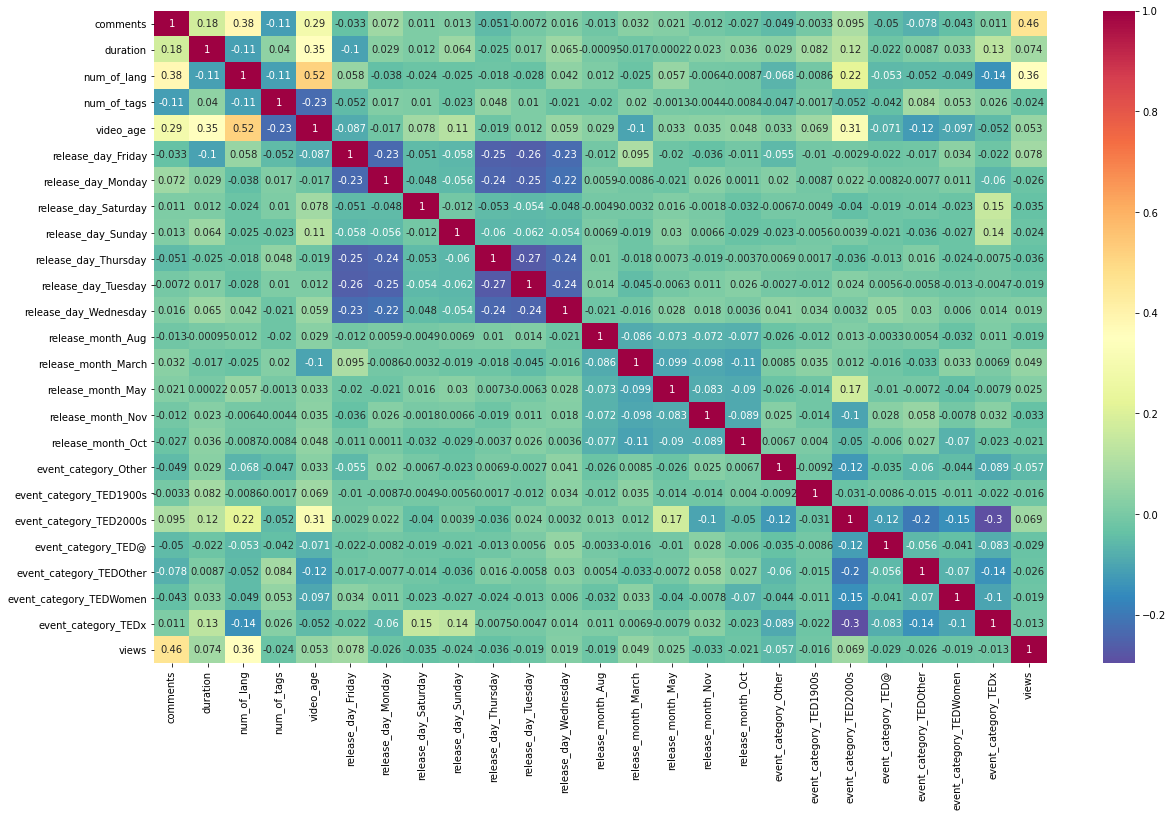

In [468]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
sns.heatmap(n_df.corr(),annot=True, cmap='Spectral_r')

**From here we can see that a lot more work on feature selection is required.**

In [374]:
X=final_df.drop(columns=['views'])
y=final_df['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=121212)

In [375]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#predicting the values for test set
y_pred = reg.predict(X_test)
#calculating MSE and RMSE for test data set
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE is" ,RMSE)

**Let's try to build a baseline model and we can improve from there.**

##**Random Forest Regressor**

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from mlxtend.regressor import StackingCVRegressor

In [476]:
rf = RandomForestRegressor(criterion='mae',max_depth=15, max_features=5, n_estimators=200, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Views mean: {:0.2f}'.format(views.mean()))
print('Views std: {:0.2f}'.format(views.std()))

Training MAE: 822295.75
Test MAE: 1079792.13
Views mean: 2148005.57
Views std: 3451225.52


* **It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.**

**Let's plot the feature importance score w.r.t. RF model**

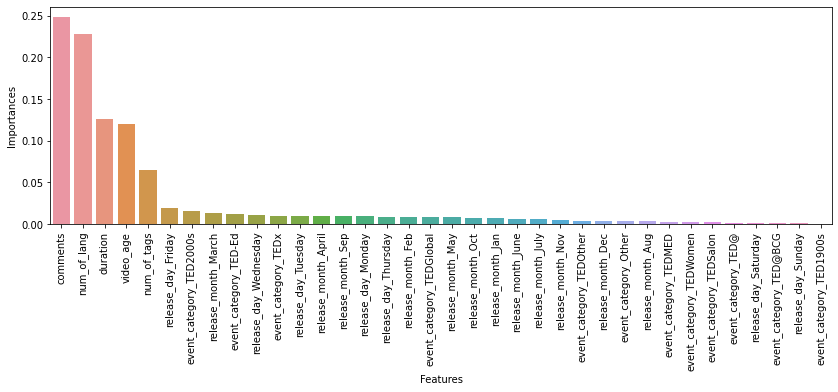

In [475]:
importances = pd.DataFrame({'Features': X_train.columns, 
                                'Importances': rf.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

##**Let's try ExtraTreesRegressor.**

In [473]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

In [478]:
et = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, random_state=2019, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
# print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Test MAE: 1020276.84
